# Bank PEP Determination Through Classification

#### The purpose of this exercise is to calculate and classify whether or not a bank account holder would likely create a Equity account with the bank.

## Data Ingestion

In [3]:
import pandas as pd
import numpy as np

In [4]:
bank_data1 = pd.read_csv("bank_data.csv", header = 0)
bank_data1.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [5]:
bank_data2 = bank_data1.drop(['id','pep'], axis = 1)
bd_target = bank_data1.pep
bank_data2.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO


In [6]:
bank_data2 = pd.get_dummies(bank_data2)
bank_data2.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,48,17546.0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0
1,40,30085.1,3,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1
2,51,16575.4,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0
3,23,20375.4,3,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0
4,57,50576.3,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0


In [7]:
bd = bank_data2.reindex(np.random.permutation(bank_data2.index))

In [8]:
from sklearn.model_selection import train_test_split
bd_train, bd_test, bd_target_train, bd_target_test = train_test_split(bd, bd_target, test_size = 0.2, random_state = 90)

In [9]:
bd_target_train.head()

294     NO
39      NO
417    YES
103     NO
366    YES
Name: pep, dtype: object

## Preprocessing the data and running KNN algorithm on the Bank Data

In [10]:
#Normalizing the variables using the min max normalization method
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(bd_train)

MinMaxScaler()

In [11]:
bd_train_norm = pd.DataFrame(min_max_scaler.fit_transform(bd_train), columns = bd_train.columns)
bd_test_norm = pd.DataFrame(min_max_scaler.fit_transform(bd_test), columns = bd_test.columns)

In [12]:
from sklearn import neighbors
n_neighbors = 5

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(bd_train_norm, bd_target_train)

KNeighborsClassifier(weights='distance')

In [13]:
knnpreds_test = knnclf.predict(bd_test_norm)
knnpreds_test

array(['NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES'],
      dtype=object)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(bd_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.54      0.60      0.57        63
         YES       0.49      0.42      0.45        57

    accuracy                           0.52       120
   macro avg       0.51      0.51      0.51       120
weighted avg       0.51      0.52      0.51       120



In [15]:
knncm = confusion_matrix(bd_target_test, knnpreds_test)
print(knncm)

[[38 25]
 [33 24]]


In [16]:
print('Results of the testing is ', knnclf.score(bd_test_norm, bd_target_test))
print('Results of the training is ', knnclf.score(bd_train_norm, bd_target_train)) 

Results of the testing is  0.5166666666666667
Results of the training is  1.0


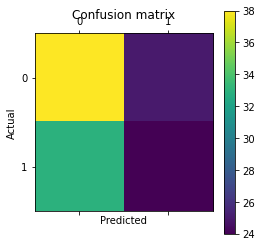

In [17]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [18]:
n_neighbors = 8

knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
knnclf.fit(bd_train_norm, bd_target_train)
knnpreds_test = knnclf.predict(bd_test_norm)
print(classification_report(bd_target_test, knnpreds_test))

              precision    recall  f1-score   support

          NO       0.54      0.78      0.64        63
         YES       0.53      0.28      0.37        57

    accuracy                           0.54       120
   macro avg       0.54      0.53      0.50       120
weighted avg       0.54      0.54      0.51       120



In [19]:
knncm = confusion_matrix(bd_target_test, knnpreds_test)
print(knncm)

[[49 14]
 [41 16]]


In [20]:
print('Results of the testing is ', knnclf.score(bd_test_norm, bd_target_test))
print('Results of the training is ', knnclf.score(bd_train_norm, bd_target_train)) 

Results of the testing is  0.5416666666666666
Results of the training is  0.6333333333333333


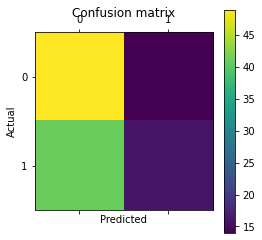

In [21]:
import pylab as plt
%matplotlib inline
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### From my analysis, as the K Neighbors increased there was a slight increase in the correct classification of the values. While there is a perfect classification of the training data, the testing data proved otherwise and showed only a 50% precision. I attempted to understand the difference when the distance parameter is not used. This increased the accuracy by approximately 5 percent when the K value is 8 with a uniform weight. These values provided the best accuracy rate. After this point, there are diminshing returns.

In [22]:
from sklearn import tree

In [23]:
treeclf = tree.DecisionTreeClassifier()
treeclf.fit(bd_train, bd_target_train)
treepreds_test = treeclf.predict(bd_test)
print(treepreds_test)

['YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO'
 'YES' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO'
 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO'
 'NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'YES'
 'NO']


In [24]:
treeclf.score(bd_test, bd_target_test)

0.49166666666666664

In [25]:
treeclf.score(bd_train, bd_target_train)

1.0

In [26]:
print(classification_report(bd_target_test, treepreds_test))

              precision    recall  f1-score   support

          NO       0.51      0.57      0.54        63
         YES       0.46      0.40      0.43        57

    accuracy                           0.49       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.49      0.49      0.49       120



#### Based on the above, we can clearly see what happens when there is no differentiation between the training and test data. The data model will be able to perfectly predict the available data. This is known as overfitting. Overfitting tends to happen when the model tries to fit every peak and every valley of the data. In this case scenario, we split the existing data to split the information and test the model on 'unseen' data. And as we can see above, the test data only received an score of 0.51 or 51% accuracy. The model, which seemed to fit the training data perfectly, does not provide the same level of confidence when it comes to unseen test data.